#**HOMEWORK 2: REAL ESTATE PRICE PREDICTION (Total: / 25 points)**

# Names: Yipeng Guo (U17061528) & Yilun Wang (U84912213)

>



Make sure that you answer the two conceptual questions provided at the front of the notebook (edit the XXX response sections to provide your answers). You probably want to answer these last, after you finish the hands-on portion of the assignment. 

#*Background: Use Case*

Your task here is to use the supplied dataset describing homes, including four photos per home and some other structured features, along with an associated home sale price label, to try to fit a predictive model of sale price.

The use case here is as follows. Your customers are individual sellers, buyers, and real estate agent, who wishes to set their sale price, or their offer price on a new home. You can assume the user will always have these features available to them at the time of prediction (i.e., the four photo types in question, as well as the structured features). 

#**Answers to Written Questions (2 points)**

**Question 1: Why is it necessaty to resize the images? What impact, conceptually, would the choice of image size have on the prediction task, computationally / practically, but also in terms of prediction performnace (note: I'm not asking you try out different sizes to see what happens; I'm asking you to think about 'why' a choice of a smaller vs. larger image resizing would matter.)**

Answer: We must resize the images because neural networks receive inputs of the same size. The larger the fixed size, the less shrinking required. Less shrinking means less deformation of features and patterns inside the image. That is, the performance of our model would be better.

**Question 2: Are there any predictors that you decided to discard here (numeric or image-based)? Why or why not; what did you consider when making these choices? Did you add any features? What, and why?**

XXX

#**Importing the Data**

I've provided some starter code for importing the data...

Mounted at /content/drive
The shape of our kitchen image array is (535, 200, 200, 3)


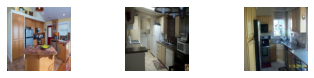

In [141]:
import tensorflow as tf
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import glob
from PIL import Image

drive.mount('/content/drive', force_remount=True)

# Replace with your basepath to the extracted dataset in your Google Drive
basePath = 'drive/My Drive/BA 865 Neural Networks/Houses Dataset'

# These are the column headers for the home characteristics data.
cols = ['bedrooms','bathrooms','area','zipcode','price']

# We first pull in the numeric features for houses from the text file.
numericData = pd.read_csv(f'{basePath}/all/HousesInfo.txt', sep=" ", header=None, names=cols)

# Pulling out the labels
labels = numericData['price']

image_size = (200,200)

# Reading the images into memory may take a minute - be patient :).
def read_images(imageType):
  image_list = []
  for file in glob.glob(f"{basePath}/all/{imageType}/*"):
    im=Image.open(file)
    im=im.resize(size=image_size)
    image_list.append(np.divide(np.array(im),255))
  return np.stack(image_list)

front_image = read_images("frontal")
bathroom_image = read_images("bathroom")
bedroom_image = read_images("bedroom")
kitchen_image = read_images("kitchen")

print(f'The shape of our kitchen image array is {kitchen_image.shape}')

# Our 535 houses' images are all now in memory as 200x200 pictures, with 3 channels (RGB). Feel free to change the image size.
for i in range(3):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(kitchen_image[i])
    plt.axis("off")

Shuffle the different arrays, in unison (preserving row ordering across the arrays).

In [127]:
labels

0      869500
1      865200
2      889000
3      910000
4      971226
        ...  
530    399900
531    460000
532    407000
533    419000
534    615000
Name: price, Length: 535, dtype: int64

In [133]:
del numericData['price']

In [134]:
shuffled_indices= np.arange(front_image.shape[0])
np.random.shuffle(shuffled_indices)

front_image = front_image[shuffled_indices]
kitchen_image = kitchen_image[shuffled_indices]
bathroom_image = bathroom_image[shuffled_indices]
bedroom_image = bedroom_image[shuffled_indices]
numericData = numericData.iloc[shuffled_indices]
labels = labels[shuffled_indices]

In [142]:
# check numeric data
numeric

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
0,0.536639,1.342907,1.379826,-0.043274,-0.075094,-0.061256,-0.043274,-0.061256,-0.043274,-0.043274,-0.086793,-0.115142,-0.043274,-0.061256,-0.043274,-0.144887,6.601767,-0.130806,-0.144887,-0.043274,-0.075094,-0.043274,-0.043274,-0.043274,-0.043274,-0.075094,-0.252227,-0.043274,-0.144887,-0.043274,-0.061256,-0.479463,-0.043274,-0.22601,-0.061256,-0.130806,-0.317526,-0.043274,-0.144887,-0.043274,-0.335061,-0.355409,-0.043274,-0.043274,-0.28809,-0.207087,-0.043274,-0.043274,-0.043274,-0.138013,-0.151475,-0.086793
1,0.536639,0.337019,0.799482,23.108440,-0.075094,-0.061256,-0.043274,-0.061256,-0.043274,-0.043274,-0.086793,-0.115142,-0.043274,-0.061256,-0.043274,-0.144887,-0.151475,-0.130806,-0.144887,-0.043274,-0.075094,-0.043274,-0.043274,-0.043274,-0.043274,-0.075094,-0.252227,-0.043274,-0.144887,-0.043274,-0.061256,-0.479463,-0.043274,-0.22601,-0.061256,-0.130806,-0.317526,-0.043274,-0.144887,-0.043274,-0.335061,-0.355409,-0.043274,-0.043274,-0.28809,-0.207087,-0.043274,-0.043274,-0.043274,-0.138013,-0.151475,-0.086793
2,-0.325529,1.342907,1.273566,-0.043274,-0.075094,-0.061256,-0.043274,-0.061256,-0.043274,-0.043274,-0.086793,-0.115142,-0.043274,-0.061256,-0.043274,-0.144887,-0.151475,-0.130806,6.901910,-0.043274,-0.075094,-0.043274,-0.043274,-0.043274,-0.043274,-0.075094,-0.252227,-0.043274,-0.144887,-0.043274,-0.061256,-0.479463,-0.043274,-0.22601,-0.061256,-0.130806,-0.317526,-0.043274,-0.144887,-0.043274,-0.335061,-0.355409,-0.043274,-0.043274,-0.28809,-0.207087,-0.043274,-0.043274,-0.043274,-0.138013,-0.151475,-0.086793
3,1.398807,2.348795,1.354487,-0.043274,-0.075094,-0.061256,-0.043274,-0.061256,-0.043274,-0.043274,-0.086793,-0.115142,-0.043274,-0.061256,-0.043274,-0.144887,-0.151475,7.644897,-0.144887,-0.043274,-0.075094,-0.043274,-0.043274,-0.043274,-0.043274,-0.075094,-0.252227,-0.043274,-0.144887,-0.043274,-0.061256,-0.479463,-0.043274,-0.22601,-0.061256,-0.130806,-0.317526,-0.043274,-0.144887,-0.043274,-0.335061,-0.355409,-0.043274,-0.043274,-0.28809,-0.207087,-0.043274,-0.043274,-0.043274,-0.138013,-0.151475,-0.086793
4,-0.325529,1.342907,1.431321,-0.043274,-0.075094,-0.061256,-0.043274,-0.061256,-0.043274,-0.043274,-0.086793,-0.115142,-0.043274,-0.061256,-0.043274,-0.144887,-0.151475,-0.130806,6.901910,-0.043274,-0.075094,-0.043274,-0.043274,-0.043274,-0.043274,-0.075094,-0.252227,-0.043274,-0.144887,-0.043274,-0.061256,-0.479463,-0.043274,-0.22601,-0.061256,-0.130806,-0.317526,-0.043274,-0.144887,-0.043274,-0.335061,-0.355409,-0.043274,-0.043274,-0.28809,-0.207087,-0.043274,-0.043274,-0.043274,-0.138013,-0.151475,-0.086793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,1.398807,-0.668868,-0.244321,-0.043274,-0.075094,-0.061256,-0.043274,-0.061256,-0.043274,-0.043274,-0.086793,-0.115142,-0.043274,-0.061256,-0.043274,-0.144887,-0.151475,-0.130806,-0.144887,-0.043274,-0.075094,-0.043274,-0.043274,-0.043274,-0.043274,-0.075094,-0.252227,-0.043274,-0.144887,-0.043274,-0.061256,-0.479463,-0.043274,-0.22601,-0.061256,-0.130806,-0.317526,-0.043274,-0.144887,-0.043274,-0.335061,-0.355409,-0.043274,-0.043274,-0.28809,4.828890,-0.043274,-0.043274,-0.043274,-0.138013,-0.151475,-0.086793
531,0.536639,0.839963,5.861554,-0.043274,-0.075094,-0.061256,-0.043274,-0.061256,-0.043274,-0.043274,-0.086793,-0.115142,-0.043274,-0.061256,-0.043274,-0.144887,-0.151475,-0.130806,-0.144887,-0.043274,-0.075094,-0.043274,-0.043274,-0.043274,-0.043274,-0.075094,-0.252227,-0.043274,-0.144887,-0.043274,-0.061256,-0.479463,-0.043274,-0.22601,-0.061256,-0.130806,-0.317526,-0.043274,-0.144887,-0.043274,-0.335061,-0.355409,-0.043274,-0.043274,-0.28809,4.828890,-0.043274,-0.043274,-0.043274,-0.138013,-0.151475,-0.086793
532,-0.325529,-0.668

In [67]:
print(type(numericData['area'][0]))
print(type(numericData['zipcode'][0]))
print(type(numericData['bathrooms'][0]))
print(type(numericData['bedrooms'][0]))

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.int64'>


In [68]:
print(numericData['area'][0])

4053


In [119]:
from sklearn.preprocessing import LabelBinarizer
Binarizer = LabelBinarizer().fit(numericData["zipcode"])
zipcode = pd.DataFrame(Binarizer.transform(numericData["zipcode"]))

In [120]:
# drop label & zipcode
numeric = numericData.drop(["zipcode","price"],axis=1)
# append zipcode
numeric = numeric.merge(pd.DataFrame(zipcode), left_index=True, right_index=True)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric = pd.DataFrame(scaler.fit_transform(numeric))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [70]:
zipcode.shape

(535, 49)

In [ ]:
zipcode

In [75]:
del numericData['zipcode']

#**Create a Multi-Modal NN from Scratch (13 points)**

#*Define Your Model*

Provide your code to implement a multi-modal NN. You should evaluate your model's loss in terms of mean absolute error (MAE).

In [158]:
def build_model():
    
    # PROVIDE YOUR CODE HERE
    # Define image input branch.

    ## front
    front_inputs = layers.Input(shape=(front_image.shape[1],front_image.shape[2],front_image.shape[3]), name="Front")
    data_augmentation = keras.Sequential([layers.RandomFlip("horizontal"),layers.RandomRotation(0.1),layers.RandomZoom(0.2),])
    x = data_augmentation(front_inputs)
    x = layers.Rescaling(1./255)(x)
 
    for size in [32, 64]:
        residual = x
        x = layers.Conv2D(filters=size,kernel_size=3,padding="same",activation="relu")(x)
        x = layers.MaxPool2D(2,strides=2)(x)
  
        residual = layers.Conv2D(size, 1, strides=2, padding="same", use_bias=False)(residual)
        x = layers.add([x, residual])
  
    front_outputs = layers.GlobalMaxPooling2D()(x)

    ## bathroom
    bathroom_inputs = layers.Input(shape=(bathroom_image.shape[1],bathroom_image.shape[2],bathroom_image.shape[3]), name="Bathroom")
    data_augmentation = keras.Sequential([layers.RandomFlip("horizontal"),layers.RandomRotation(0.1),layers.RandomZoom(0.2),])
    x = data_augmentation(bathroom_inputs)
    x = layers.Rescaling(1./255)(x)
 
    for size in [32, 64, 128]:
        residual = x
        x = layers.Conv2D(filters=size,kernel_size=3,padding="same",activation="relu")(x)
        x = layers.MaxPool2D(2,strides=2)(x)
  
        residual = layers.Conv2D(size, 1, strides=2, padding="same", use_bias=False)(residual)
        x = layers.add([x, residual])
  
    bathroom_outputs = layers.GlobalMaxPooling2D()(x)

    ## bedroom
    bedroom_inputs = layers.Input(shape=(bedroom_image.shape[1],bedroom_image.shape[2],bedroom_image.shape[3]), name="Bedroom")
    data_augmentation = keras.Sequential([layers.RandomFlip("horizontal"),layers.RandomRotation(0.1),layers.RandomZoom(0.2),])
    x = data_augmentation(bedroom_inputs)
    x = layers.Rescaling(1./255)(x)
 
    for size in [32, 64, 128]:
        residual = x
        x = layers.Conv2D(filters=size,kernel_size=3,padding="same",activation="relu")(x)
        x = layers.MaxPool2D(2,strides=2)(x)
  
        residual = layers.Conv2D(size, 1, strides=2, padding="same", use_bias=False)(residual)
        x = layers.add([x, residual])
  
    bedroom_outputs = layers.GlobalMaxPooling2D()(x)

    ## kitchen
    kitchen_inputs = layers.Input(shape=(kitchen_image.shape[1],kitchen_image.shape[2],kitchen_image.shape[3]), name="Kitchen")
    data_augmentation = keras.Sequential([layers.RandomFlip("horizontal"),layers.RandomRotation(0.1),layers.RandomZoom(0.2),])
    x = data_augmentation(kitchen_inputs)
    x = layers.Rescaling(1./255)(x)
 
    for size in [32, 64, 128]:
        residual = x
        x = layers.Conv2D(filters=size,kernel_size=3,padding="same",activation="relu")(x)
        x = layers.MaxPool2D(2,strides=2)(x)
  
        residual = layers.Conv2D(size, 1, strides=2, padding="same", use_bias=False)(residual)
        x = layers.add([x, residual])
  
    kitchen_outputs = layers.GlobalMaxPooling2D()(x)

    # Define numeric input branch
    numeric_inputs = layers.Input(shape=numeric.shape[1],name="Numbers")
    x = layers.Dense(32,activation="relu")(numeric_inputs)
    x = layers.Dense(16,activation="relu")(x)
    numeric_outputs = layers.Dense(5,activation="relu")(x)

    # Merge
    merge = layers.Concatenate()([front_outputs, bathroom_outputs, bedroom_outputs, kitchen_outputs, numeric_outputs])
    x = layers.Dense(16,activation="relu")(merge)
    x = layers.Dense(8,activation="relu")(x)
    final_outputs = layers.Dense(1, activation="relu")(x)

    # Final model
    model = keras.Model(inputs=[front_inputs, bathroom_inputs, bedroom_inputs, kitchen_inputs, numeric_inputs],outputs=final_outputs) 
    model.compile(loss="mae", optimizer=keras.optimizers.Adam(learning_rate=0.1), metrics="mae")

    return model
    
model = build_model()

In [159]:
history = model.fit(x=[front_image, kitchen_image, bathroom_image, bedroom_image, numeric], y=labels, epochs=20, batch_size=25)

Epoch 1/20
22/22 [==============================] - 5s 90ms/step - loss: 526745.2500 - mae: 526745.2500
Epoch 2/20
22/22 [==============================] - 2s 90ms/step - loss: 327578.0312 - mae: 327578.0312
Epoch 3/20
22/22 [==============================] - 2s 90ms/step - loss: 222013.3125 - mae: 222013.2969
Epoch 4/20
22/22 [==============================] - 2s 89ms/step - loss: 179394.3281 - mae: 179394.3281
Epoch 5/20
22/22 [==============================] - 2s 90ms/step - loss: 160895.7188 - mae: 160895.7188
Epoch 6/20
22/22 [==============================] - 2s 90ms/step - loss: 156063.2344 - mae: 156063.2344
Epoch 7/20
22/22 [==============================] - 2s 91ms/step - loss: 166893.0781 - mae: 166893.0781
Epoch 8/20
22/22 [==============================] - 2s 91ms/step - loss: 185667.3125 - mae: 185667.3125
Epoch 9/20
22/22 [==============================] - 2s 96ms/step - loss: 174619.8906 - mae: 174619.8906
Epoch 10/20
22/22 [==============================] - 2s 92ms/ste

In [160]:
#Let's do a K-fold validation
k = 5
num_validation_samples = len(numeric) // k
mae_histories = []  

for x in range(k): 
    val_front  = front_image[x * num_validation_samples : (x + 1) * num_validation_samples] 
    val_kitchen = kitchen_image[x * num_validation_samples : (x + 1) * num_validation_samples]  
    val_bedroom = bedroom_image[x * num_validation_samples : (x + 1) * num_validation_samples] 
    val_numeric = numeric[x * num_validation_samples : (x + 1) * num_validation_samples] 
    val_bathroom = bathroom_image[x * num_validation_samples : (x + 1) * num_validation_samples]
    val_labels  = labels[x * num_validation_samples : (x + 1) * num_validation_samples]

    front_in = np.concatenate(
        [front_image[:x * num_validation_samples],
         front_image[(x + 1) * num_validation_samples:]],axis=0)
    bathroom_in = np.concatenate(
        [bathroom_image[:x * num_validation_samples],
         bathroom_image[(x + 1) * num_validation_samples:]],axis=0)
    bedroom_in = np.concatenate(
        [bedroom_image[:x * num_validation_samples],
         bedroom_image[(x + 1) * num_validation_samples:]],axis=0)
    kitchen_in = np.concatenate(
        [kitchen_image[:x * num_validation_samples],
         kitchen_image[(x + 1) * num_validation_samples:]],axis=0)
    numeric_in = np.concatenate(
        [numeric[:x * num_validation_samples],
         numeric[(x + 1) * num_validation_samples:]],axis=0)
    labels_in = np.concatenate(
        [labels[:x * num_validation_samples],
         labels[(x + 1) * num_validation_samples:]],axis=0)
    
    model = build_model()
# fit model
    val_history = model.fit(x = [front_in, bathroom_in, bedroom_in, kitchen_in, numeric_in], 
                            y = labels_in,
                            validation_data=([val_front, val_bathroom, val_bedroom, val_kitchen, val_numeric], val_labels),
                            epochs=20, batch_size=25, verbose=0,
                            callbacks=callbacks)
    mae_history = val_history.history['val_mae']
    mae_histories.append(mae_history)

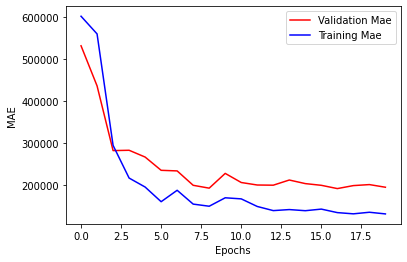

In [161]:
# plot the results

import matplotlib.pyplot as plt

plt.plot(val_history.history['val_mae'],c="r")
plt.plot(val_history.history['mae'],c="b")
plt.legend(['Validation Mae','Training Mae'])
plt.xlabel("Epochs") 
plt.ylabel("MAE")
plt.show()

In [167]:
# define our dense network

def build_model_preTrain():
 
    #front model
    front_inputs2 = keras.Input(shape=front_image.shape[1],name='front2')
    x = layers.Dense(32, activation='relu')(front_inputs2)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(256, activation='relu')(x)
    front_outputs2 = layers.Dense(8, activation="relu")(x)
    
    #kitchen model
    kitchen_inputs2 = keras.Input(shape=kitchen_image.shape[1],name='kitchen2')
    x = layers.Dense(32, activation='relu')(kitchen_inputs2)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(256, activation='relu')(x)
    kitchen_outputs2 = layers.Dense(8, activation="relu")(x)

    #bathroom model
    bathroom_inputs2 = keras.Input(shape=bathroom_image.shape[1],name='bathroom2')
    x = layers.Dense(32, activation='relu')(bathroom_inputs2)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(256, activation='relu')(x)
    bathroom_outputs2 = layers.Dense(8, activation="relu")(x)

    #bedroom model
    bedroom_inputs2 = keras.Input(shape=bedroom_image.shape[1],name='bedroom2')
    x = layers.Dense(32, activation='relu')(bedroom_inputs2)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(256, activation='relu')(x)
    bedroom_outputs2 = layers.Dense(8, activation="relu")(x)

    #numeric model
    numeric_inputs2 = keras.Input(shape=numeric.shape[1],name='numeric2')
    x = layers.Dense(32, activation='relu')(numeric_inputs2)
    x = layers.Dense(16, activation="relu")(x)
    numeric_outputs2 = layers.Dense(8, activation="relu")(x)

    #Then merge them
    merge = layers.Concatenate()

    #merge models
    merge = layers.Concatenate()([front_outputs2, kitchen_outputs2, bathroom_outputs2, bedroom_outputs2, numeric_outputs2])
    x = layers.Dense(8,activation="relu")(merge)
    final_outputs2 = layers.Dense(1)(x)

    #Final model
    model_preTrain = keras.Model(inputs = [front_inputs2, kitchen_inputs2, bathroom_inputs2, bedroom_inputs2, numeric_inputs2], outputs = final_outputs2)

    #model compile
    model_preTrain.compile(loss="mae", optimizer=keras.optimizers.Adam(learning_rate=0.1))

    return model_preTrain

model_preTrain = build_model_preTrain()

In [168]:
#model fitting
history = model_preTrain.fit(x=[front_image, kitchen_image, bathroom_image, bedroom_image, numeric], y=labels, epochs=10, batch_size=25)

Epoch 1/10
22/22 [==============================] - 1s 4ms/step - loss: 537324.2500
Epoch 2/10
22/22 [==============================] - 0s 4ms/step - loss: 492647.5938
Epoch 3/10
22/22 [==============================] - 0s 4ms/step - loss: 246047.4062
Epoch 4/10
22/22 [==============================] - 0s 4ms/step - loss: 173448.4219
Epoch 5/10
22/22 [==============================] - 0s 4ms/step - loss: 174940.1562
Epoch 6/10
22/22 [==============================] - 0s 4ms/step - loss: 156268.2031
Epoch 7/10
22/22 [==============================] - 0s 4ms/step - loss: 147253.4844
Epoch 8/10
22/22 [==============================] - 0s 5ms/step - loss: 155023.0000
Epoch 9/10
22/22 [==============================] - 0s 5ms/step - loss: 142939.6406
Epoch 10/10
22/22 [==============================] - 0s 4ms/step - loss: 145890.2500


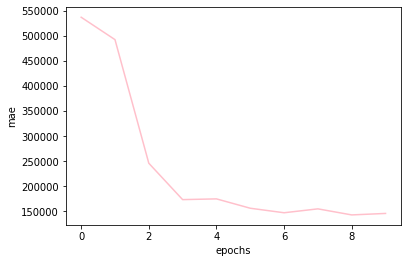

In [169]:
# plot our model's validation
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], c='pink')
plt.xlabel('epochs')
plt.ylabel('mae')
plt.show()

In [77]:
# Check our inputs shape
print(front_image.shape)
print(kitchen_image.shape)
print(bathroom_image.shape)
print(bedroom_image.shape)
print(numericData.shape)

(535, 200, 200, 3)
(535, 200, 200, 3)
(535, 200, 200, 3)
(535, 200, 200, 3)
(535, 3)


In [78]:
# imports
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers

To stave off the overfitting, we will first start by augmenting our dataset. This is a simple way to do it in a Sequential model, by adding a data augmentation layer. This step in our model will randomly mess with the data at each pass, flipping, rotating and zooming each image. 

In [123]:
def build_model():

    data_augmentation = keras.Sequential([   layers.RandomFlip("horizontal"),  
                           layers.RandomRotation(0.1),  
                           layers.RandomZoom(0.2),])    
    #front model
    front_inputs = keras.Input(shape=(front_image.shape[1],front_image.shape[2],front_image.shape[3]),name='front')
    x = data_augmentation(front_inputs)
    x = layers.Conv2D(filters=32, kernel_size=3, padding="same",activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=64, kernel_size=3, padding="same",activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=128, kernel_size=3, padding="same",activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=256, kernel_size=3, padding="same",activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=256, kernel_size=3, padding="same",activation="relu")(x)

    front_outputs = layers.GlobalMaxPooling2D()(x)

    #kitchen model
    kitchen_inputs = keras.Input(shape=(kitchen_image.shape[1],kitchen_image.shape[2],kitchen_image.shape[3]),name='kitchen')
    x = data_augmentation(kitchen_inputs)
    x = layers.Conv2D(filters=32, kernel_size=3, padding="same",activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=64, kernel_size=3, padding="same",activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=128, kernel_size=3, padding="same",activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=256, kernel_size=3, padding="same",activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=256, kernel_size=3, padding="same",activation="relu")(x)

    kitchen_outputs = layers.GlobalMaxPooling2D()(x)

    #bathroom model
    bathroom_inputs = keras.Input(shape=(bathroom_image.shape[1],bathroom_image.shape[2],bathroom_image.shape[3]),name='bathroom')
    x = data_augmentation(bathroom_inputs)
    x = layers.Conv2D(filters=32, kernel_size=3, padding="same",activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=64, kernel_size=3, padding="same",activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=128, kernel_size=3, padding="same",activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=256, kernel_size=3, padding="same",activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=256, kernel_size=3, padding="same",activation="relu")(x)

    bathroom_outputs = layers.GlobalMaxPooling2D()(x)

    #bedroom_model
    bedroom_inputs = keras.Input(shape=(bedroom_image.shape[1],bedroom_image.shape[2],bedroom_image.shape[3]),name='bedroom')
    x = data_augmentation(bedroom_inputs)
    x = layers.Conv2D(filters=32, kernel_size=3, padding="same",activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=64, kernel_size=3, padding="same",activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=128, kernel_size=3, padding="same",activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=256, kernel_size=3, padding="same",activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=256, kernel_size=3, padding="same",activation="relu")(x)
 
    bedroom_outputs = layers.GlobalMaxPooling2D()(x)

    #numericData input
    numeric_inputs = keras.Input(shape=numericData.shape[1],name='numeric')
    x = layers.Dense(32,activation="relu")(numeric_inputs)
    x = layers.Dense(16,activation="relu")(x)

    numeric_outputs = layers.Dense(5, activation="relu")(x)

    #merge models
    merge = layers.Concatenate()([front_outputs,kitchen_outputs,bathroom_outputs,bedroom_outputs,numeric_outputs])
    x = layers.Dense(8,activation="relu")(merge)
    final_outputs = layers.Dense(1)(x)

    model = keras.Model(inputs = [front_inputs, kitchen_inputs, bathroom_inputs, bedroom_inputs, numeric_inputs], outputs = final_outputs)


    opt = keras.optimizers.Adam(learning_rate=0.005) 
    model.compile(loss="mae", optimizer=opt, metrics="mae")

    return model


model=build_model()


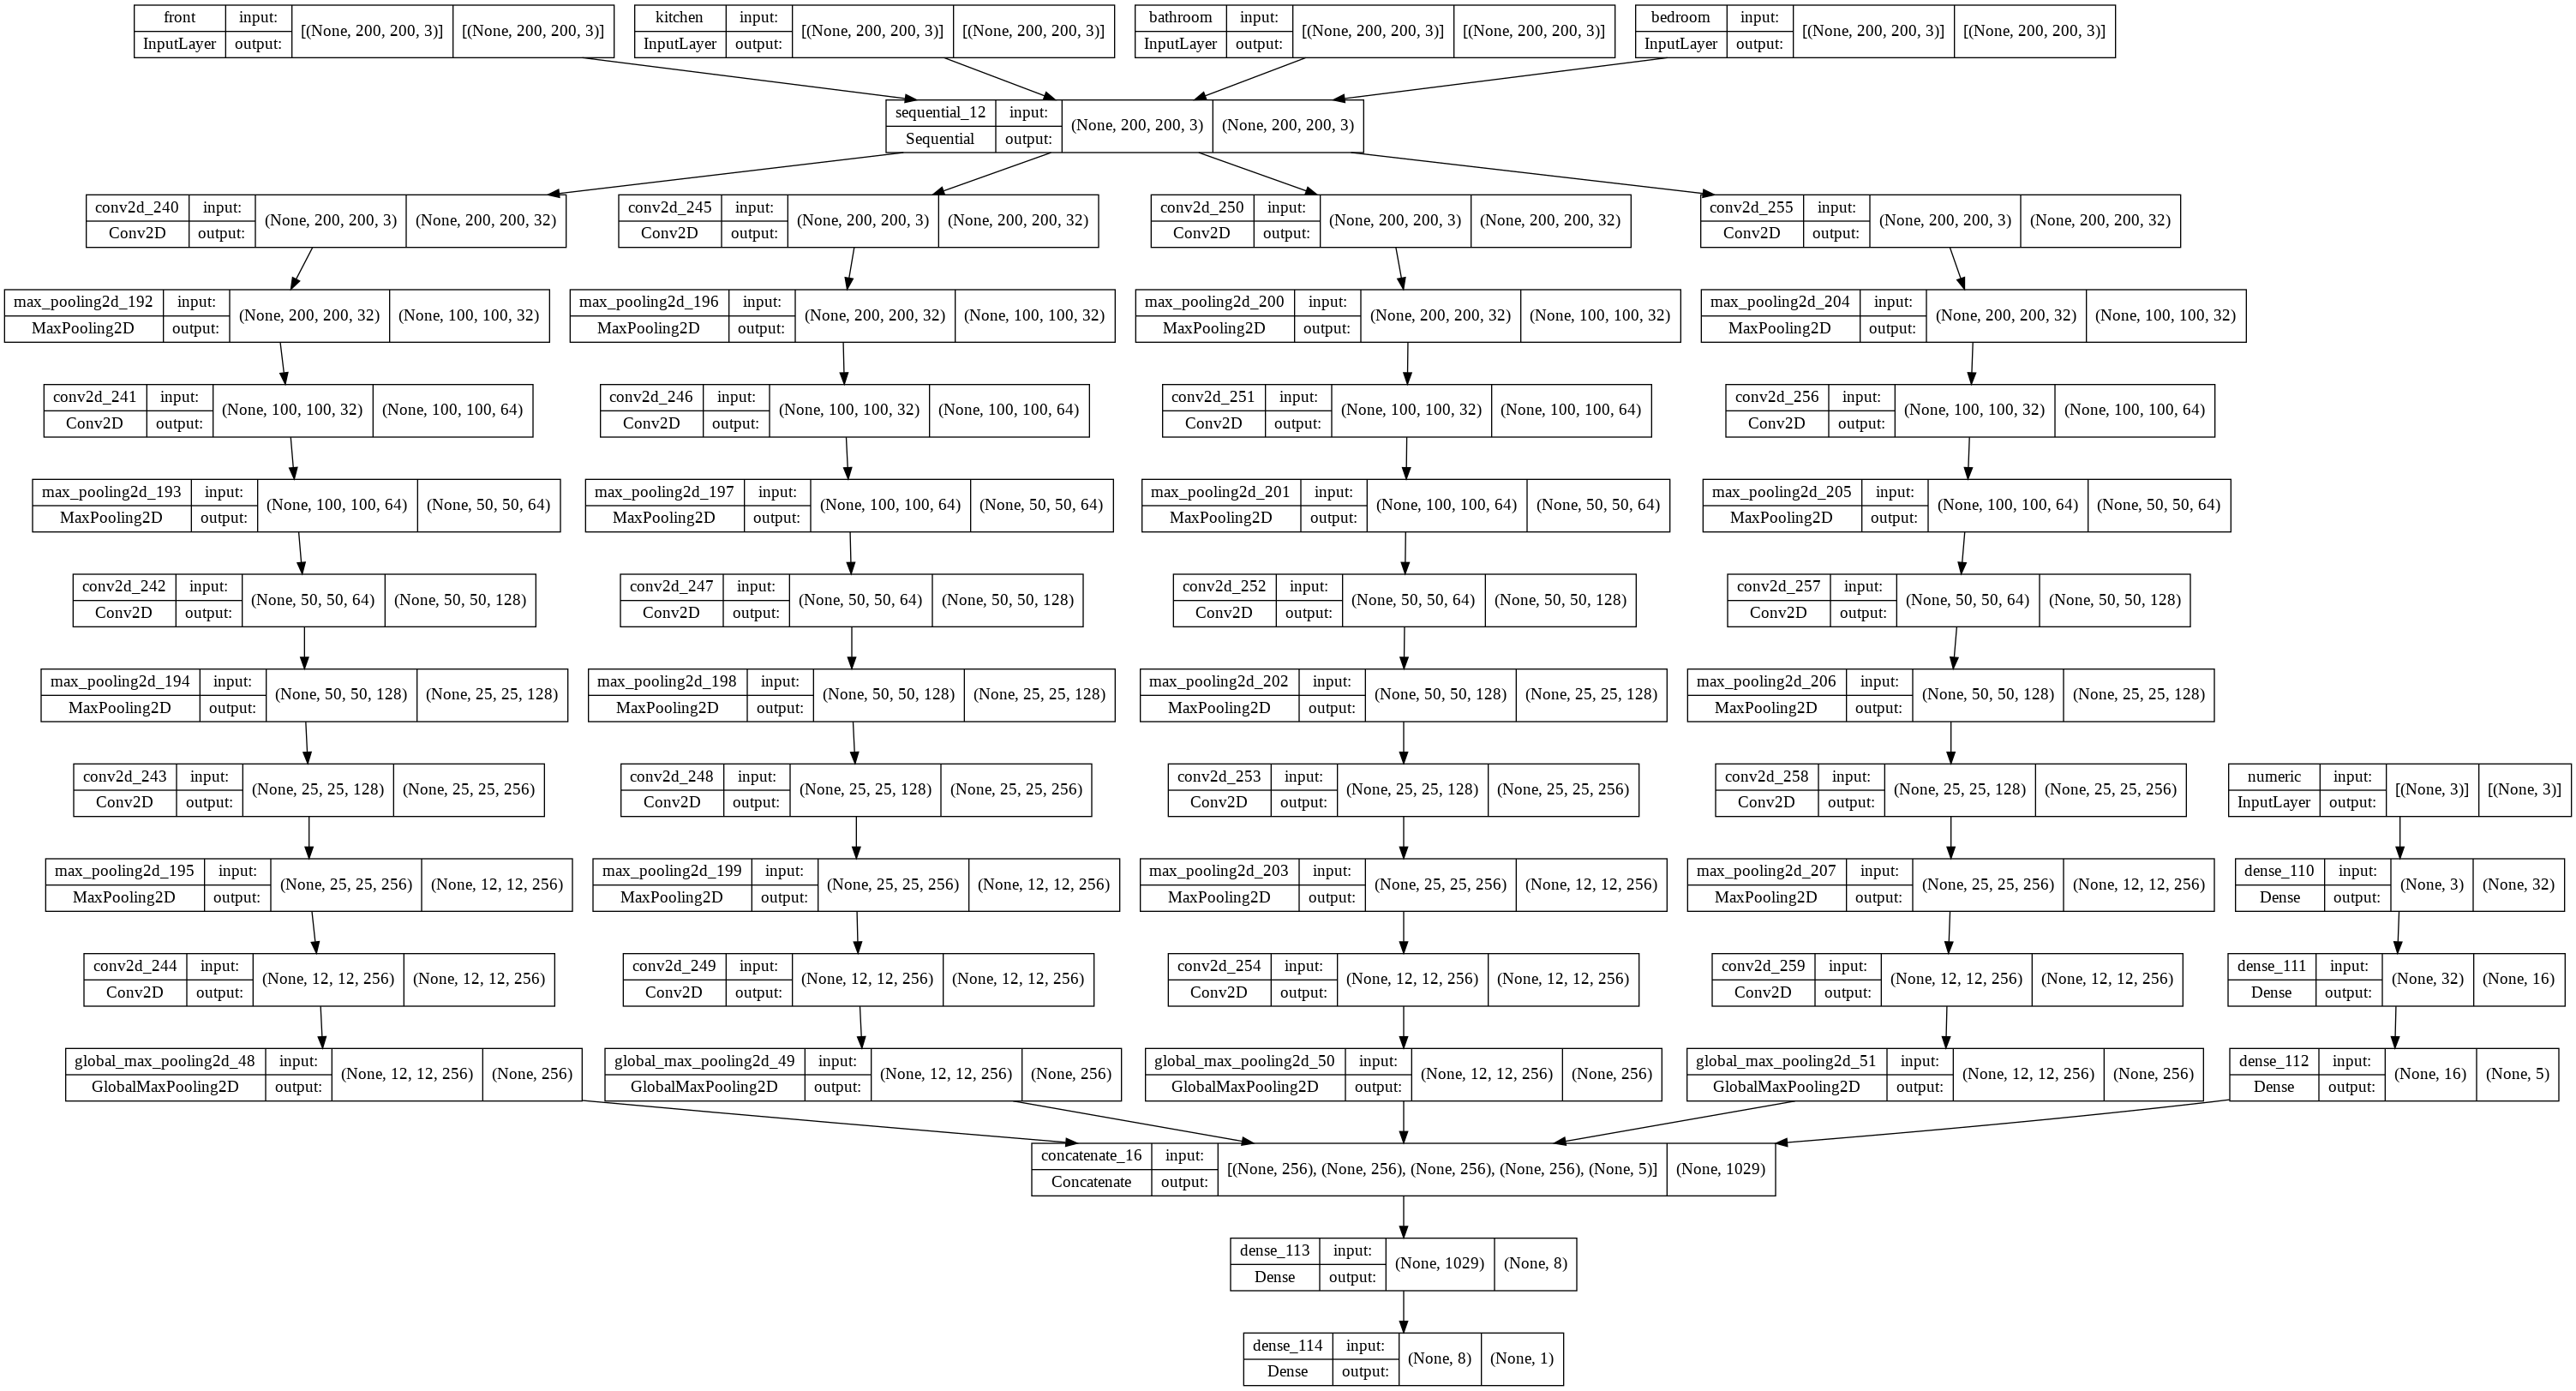

In [80]:
# plot model
keras.utils.plot_model(model,show_shapes=True)


In [124]:
# set callbacks
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="drive/My Drive/BA 865 Neural Networks/convnet_from_scratch.keras",
        save_best_only=True,
        monitor="mae")
]

#*Fit Your Model*

Train your model and track validation loss in terms of MAE.

In [125]:
#model fitting, we set epoch to 20 to get the best mae
history = model.fit(x=[front_image, kitchen_image, bathroom_image, bedroom_image, numericData], y=labels, epochs=20, batch_size=25, callbacks=callbacks)

Epoch 1/20
22/22 [==============================] - 7s 151ms/step - loss: 466820.0938 - mae: 466820.0938
Epoch 2/20
22/22 [==============================] - 2s 111ms/step - loss: 319715.6562 - mae: 319715.6250
Epoch 3/20
22/22 [==============================] - 2s 111ms/step - loss: 319710.5000 - mae: 319710.5000
Epoch 4/20
22/22 [==============================] - 2s 98ms/step - loss: 323681.9688 - mae: 323681.9688
Epoch 5/20
22/22 [==============================] - 2s 99ms/step - loss: 335335.7500 - mae: 335335.7500
Epoch 6/20
22/22 [==============================] - 2s 99ms/step - loss: 337055.5938 - mae: 337055.5938
Epoch 7/20
22/22 [==============================] - 2s 98ms/step - loss: 341778.4688 - mae: 341778.4688
Epoch 8/20
22/22 [==============================] - 2s 99ms/step - loss: 321046.5000 - mae: 321046.5000
Epoch 9/20
22/22 [==============================] - 2s 98ms/step - loss: 322378.5938 - mae: 322378.5938
Epoch 10/20
22/22 [==============================] - 2s 98ms/

In [ ]:
#Let's do a K-fold validation
k = 5
num_validation_samples = len(numericData) // k
mae_histories = []  

for x in range(k): 
    val_front  = front_image[x * num_validation_samples : (x + 1) * num_validation_samples] 
    val_kitchen = kitchen_image[x * num_validation_samples : (x + 1) * num_validation_samples]  
    val_bedroom = bedroom_image[x * num_validation_samples : (x + 1) * num_validation_samples] 
    val_numeric = numericData[x * num_validation_samples : (x + 1) * num_validation_samples] 
    val_bathroom = bathroom_image[x * num_validation_samples : (x + 1) * num_validation_samples]
    val_labels  = labels[x * num_validation_samples : (x + 1) * num_validation_samples]

    front_in = np.concatenate(
        [front_image[:x * num_validation_samples],
         front_image[(x + 1) * num_validation_samples:]],axis=0)
    bathroom_in = np.concatenate(
        [bathroom_image[:x * num_validation_samples],
         bathroom_image[(x + 1) * num_validation_samples:]],axis=0)
    bedroom_in = np.concatenate(
        [bedroom_image[:x * num_validation_samples],
         bedroom_image[(x + 1) * num_validation_samples:]],axis=0)
    kitchen_in = np.concatenate(
        [kitchen_image[:x * num_validation_samples],
         kitchen_image[(x + 1) * num_validation_samples:]],axis=0)
    numeric_in = np.concatenate(
        [numericData[:x * num_validation_samples],
         numericData[(x + 1) * num_validation_samples:]],axis=0)
    labels_in = np.concatenate(
        [labels[:x * num_validation_samples],
         labels[(x + 1) * num_validation_samples:]],axis=0)
    
    model = build_model()
# fit model
    val_history = model.fit(x = [front_in, bathroom_in, bedroom_in, kitchen_in, numeric_in], 
                            y = labels_in,
                            validation_data=([val_front, val_bathroom, val_bedroom, val_kitchen, val_numeric], val_labels),
                            epochs=20, batch_size=25, verbose=0,
                            callbacks=callbacks)
    mae_history = val_history.history['val_mae']
    mae_histories.append(mae_history)

Plot your model's loss over epochs to undertand fitting / overfitting.

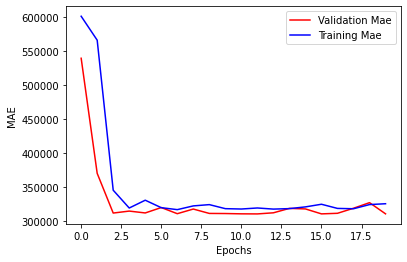

In [ ]:
# plot the results

import matplotlib.pyplot as plt

plt.plot(val_history.history['val_mae'],c="r")
plt.plot(val_history.history['mae'],c="b")
plt.legend(['Validation Mae','Training Mae'])
plt.xlabel("Epochs") 
plt.ylabel("MAE")
plt.show()

#**Now Use a Pre-Trained Model (10 points)**

In this section, you should replace the CNN components of your 'from-scratch' multi-modal network with a pre-trained model. You can use any pre-trained model you like to pre-process your images into numeric vectors, and then feed those vectors into a standard, dense feed-forward NN to generate predictions. 

#*Load Pre-Trained Model's CNN layers*

In [ ]:
# fetch pretrained model
! pip install Pillow
from torchvision import datasets, transforms
import torch
import torch.nn as nn
import torchvision.models as models
from PIL import Image

# Load the pretrained model
model = models.resnet18(pretrained=True)

#*Pre-process Your Images Through the Pre-trained Model's CNN Layers*

You need to write a quick function that loops over your images and runs them through the pre-trained CNN layers to get back the numeric vector representations.

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
import numpy as np
# Load the pretrained model
class Img2Vec():
    RESNET_OUTPUT_SIZES = {
        'resnet18': 512,
        'resnet34': 512,
        'resnet50': 2048,
        'resnet101': 2048,
        'resnet152': 2048
    }

    EFFICIENTNET_OUTPUT_SIZES = {
        'efficientnet_b0': 1280,
        'efficientnet_b1': 1280,
        'efficientnet_b2': 1408,
        'efficientnet_b3': 1536,
        'efficientnet_b4': 1792,
        'efficientnet_b5': 2048,
        'efficientnet_b6': 2304,
        'efficientnet_b7': 2560
    }

# We use resnet-18 to extract vector from image
    def __init__(self, cuda=True, model='resnet-18', layer='default', layer_output_size=512):
        """ Img2Vec
        :param cuda: If set to True, will run forward pass on GPU
        """
        self.device = torch.device("cuda" if cuda else "cpu")
        self.layer_output_size = layer_output_size
        self.model_name = model

        self.model, self.extraction_layer = self._get_model_and_layer(model, layer)

        self.model = self.model.to(self.device)

        self.model.eval()
# ResNet-18 expects images to be at least 224x224, as well as normalized with a specific mean and standard deviation. So we will first define some PyTorch transforms:
        self.scaler = transforms.Resize((224, 224))
        self.normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                              std=[0.229, 0.224, 0.225])
        self.to_tensor = transforms.ToTensor()

    def get_vec(self, img, tensor=False):
# Get vector embedding from PIL image

        if type(img) == list:
            a = [self.normalize(self.to_tensor(self.scaler(im))) for im in img]
            images = torch.stack(a).to(self.device)
            if self.model_name in ['alexnet', 'vgg']:
                my_embedding = torch.zeros(len(img), self.layer_output_size)
            elif self.model_name == 'densenet' or 'efficientnet' in self.model_name:
                my_embedding = torch.zeros(len(img), self.layer_output_size, 7, 7)
            else:
                my_embedding = torch.zeros(len(img), self.layer_output_size, 1, 1)

            def copy_data(m, i, o):
                my_embedding.copy_(o.data)

            h = self.extraction_layer.register_forward_hook(copy_data)
            with torch.no_grad():
                h_x = self.model(images)
            h.remove()

            if tensor:
                return my_embedding
            else:
                if self.model_name in ['alexnet', 'vgg']:
                    return my_embedding.numpy()[:, :]
                elif self.model_name == 'densenet' or 'efficientnet' in self.model_name:
                    return torch.mean(my_embedding, (2, 3), True).numpy()[:, :, 0, 0]
                else:
                    return my_embedding.numpy()[:, :, 0, 0]
        else:
            image = self.normalize(self.to_tensor(self.scaler(img))).unsqueeze(0).to(self.device)

            if self.model_name in ['alexnet', 'vgg']:
                my_embedding = torch.zeros(1, self.layer_output_size)
            elif self.model_name == 'densenet' or 'efficientnet' in self.model_name:
                my_embedding = torch.zeros(1, self.layer_output_size, 7, 7)
            else:
                my_embedding = torch.zeros(1, self.layer_output_size, 1, 1)

            def copy_data(m, i, o):
                my_embedding.copy_(o.data)

            h = self.extraction_layer.register_forward_hook(copy_data)
            with torch.no_grad():
                h_x = self.model(image)
            h.remove()

            if tensor:
                return my_embedding
            else:
                if self.model_name in ['alexnet', 'vgg']:
                    return my_embedding.numpy()[0, :]
                elif self.model_name == 'densenet':
                    return torch.mean(my_embedding, (2, 3), True).numpy()[0, :, 0, 0]
                else:
                    return my_embedding.numpy()[0, :, 0, 0]

    def _get_model_and_layer(self, model_name, layer):
# Internal method for getting layer from model


        if model_name.startswith('resnet') and not model_name.startswith('resnet-'):
            model = getattr(models, model_name)(pretrained=True)
            if layer == 'default':
                layer = model._modules.get('avgpool')
                self.layer_output_size = self.RESNET_OUTPUT_SIZES[model_name]
            else:
                layer = model._modules.get(layer)
            return model, layer
        elif model_name == 'resnet-18':
            model = models.resnet18(pretrained=True)
            if layer == 'default':
                layer = model._modules.get('avgpool')
                self.layer_output_size = 512
            else:
                layer = model._modules.get(layer)

            return model, layer

        elif model_name == 'alexnet':
            model = models.alexnet(pretrained=True)
            if layer == 'default':
                layer = model.classifier[-2]
                self.layer_output_size = 4096
            else:
                layer = model.classifier[-layer]

            return model, layer

        elif model_name == 'vgg':
            # VGG-11
            model = models.vgg11_bn(pretrained=True)
            if layer == 'default':
                layer = model.classifier[-2]
                self.layer_output_size = model.classifier[-1].in_features # should be 4096
            else:
                layer = model.classifier[-layer]

            return model, layer

        elif model_name == 'densenet':
            # Densenet-121
            model = models.densenet121(pretrained=True)
            if layer == 'default':
                layer = model.features[-1]
                self.layer_output_size = model.classifier.in_features # should be 1024
            else:
                raise KeyError('Un support %s for layer parameters' % model_name)

            return model, layer

        elif "efficientnet" in model_name:
            # efficientnet-b0 ~ efficientnet-b7
            if model_name == "efficientnet_b0":
                model = models.efficientnet_b0(pretrained=True)
            elif model_name == "efficientnet_b1":
                model = models.efficientnet_b1(pretrained=True)
            elif model_name == "efficientnet_b2":
                model = models.efficientnet_b2(pretrained=True)
            elif model_name == "efficientnet_b3":
                model = models.efficientnet_b3(pretrained=True)
            elif model_name == "efficientnet_b4":
                model = models.efficientnet_b4(pretrained=True)
            elif model_name == "efficientnet_b5":
                model = models.efficientnet_b5(pretrained=True)
            elif model_name == "efficientnet_b6":
                model = models.efficientnet_b6(pretrained=True)
            elif model_name == "efficientnet_b7":
                model = models.efficientnet_b7(pretrained=True)
            else:
                raise KeyError('Un support %s.' % model_name)

            if layer == 'default':
                layer = model.features
                self.layer_output_size = self.EFFICIENTNET_OUTPUT_SIZES[model_name]
            else:
                raise KeyError('Un support %s for layer parameters' % model_name)

            return model, layer

        else:
            raise KeyError('Model %s was not found' % model_name)

In [162]:
# define the function to convert all of our images to vector
def read_images(imageType):
  image_list = []
  for file in glob.glob(f"{basePath}/all/{imageType}/*"):
    im=Image.open(file)
    im=Img2Vec().get_vec(im)
    image_list.append(np.array(im))
  return np.stack(image_list)

front_image = read_images("frontal")
bathroom_image = read_images("bathroom")
bedroom_image = read_images("bedroom")
kitchen_image = read_images("kitchen")

In [ ]:
# check our data and label shape
print(front_image.shape)
print(numericData.shape)
print(labels.shape)

(535, 512)
(535, 4)
(535,)


#*Define Your Dense Network (That Accepts the Image's Feature Vectors)*

You will once again have a multi-branch network, but you've no longer any need for CNNs here. Just use Dense layers for each branch of input, and merge the branches together before producing a numeric prediction. Of course you may want to add elements to address overfitting.

In [ ]:
# define our dense network

def build_model_preTrain():
 
    #front model
    front_inputs2 = keras.Input(shape=front_image.shape[1],name='front2')
    x = layers.Dense(32, activation='relu')(front_inputs2)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(256, activation='relu')(x)
    front_outputs2 = layers.Dense(8, activation="relu")(x)
    
    #kitchen model
    kitchen_inputs2 = keras.Input(shape=kitchen_image.shape[1],name='kitchen2')
    x = layers.Dense(32, activation='relu')(kitchen_inputs2)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(256, activation='relu')(x)
    kitchen_outputs2 = layers.Dense(8, activation="relu")(x)

    #bathroom model
    bathroom_inputs2 = keras.Input(shape=bathroom_image.shape[1],name='bathroom2')
    x = layers.Dense(32, activation='relu')(bathroom_inputs2)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(256, activation='relu')(x)
    bathroom_outputs2 = layers.Dense(8, activation="relu")(x)

    #bedroom model
    bedroom_inputs2 = keras.Input(shape=bedroom_image.shape[1],name='bedroom2')
    x = layers.Dense(32, activation='relu')(bedroom_inputs2)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(256, activation='relu')(x)
    bedroom_outputs2 = layers.Dense(8, activation="relu")(x)

    #numeric model
    numeric_inputs2 = keras.Input(shape=numericData.shape[1],name='numeric2')
    x = layers.Dense(32, activation='relu')(numeric_inputs2)
    x = layers.Dense(16, activation="relu")(x)
    numeric_outputs2 = layers.Dense(8, activation="relu")(x)

    #Then merge them
    merge = layers.Concatenate()

    #merge models
    merge = layers.Concatenate()([front_outputs2, kitchen_outputs2, bathroom_outputs2, bedroom_outputs2, numeric_outputs2])
    x = layers.Dense(8,activation="relu")(merge)
    final_outputs2 = layers.Dense(1)(x)

    #Final model
    model_preTrain = keras.Model(inputs = [front_inputs2, kitchen_inputs2, bathroom_inputs2, bedroom_inputs2, numeric_inputs2], outputs = final_outputs2)

    #model compile
    model_preTrain.compile(loss="mae", optimizer="adam")

    return model_preTrain

model_preTrain = build_model_preTrain()

#*Fit Your Dense Model*

In [ ]:
#model fitting
history = model_preTrain.fit(x=[front_image, kitchen_image, bathroom_image, bedroom_image, numericData], y=labels, epochs=10, batch_size=25)

Epoch 1/10
22/22 [==============================] - 1s 5ms/step - loss: 587791.4375
Epoch 2/10
22/22 [==============================] - 0s 4ms/step - loss: 582762.5000
Epoch 3/10
22/22 [==============================] - 0s 4ms/step - loss: 557945.5625
Epoch 4/10
22/22 [==============================] - 0s 4ms/step - loss: 440864.8438
Epoch 5/10
22/22 [==============================] - 0s 4ms/step - loss: 314778.0000
Epoch 6/10
22/22 [==============================] - 0s 4ms/step - loss: 313112.5625
Epoch 7/10
22/22 [==============================] - 0s 5ms/step - loss: 312383.6875
Epoch 8/10
22/22 [==============================] - 0s 4ms/step - loss: 311322.7500
Epoch 9/10
22/22 [==============================] - 0s 4ms/step - loss: 312444.0000
Epoch 10/10
22/22 [==============================] - 0s 4ms/step - loss: 311712.3438


Finally, plot your model's validation loss over training. 

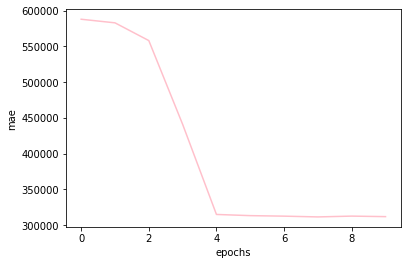

In [ ]:
# plot our model's validation
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], c='pink')
plt.xlabel('epochs')
plt.ylabel('mae')
plt.show()